<a href="https://colab.research.google.com/github/douglasmmachado/Battery_SoC/blob/main/examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import nnfs

In [28]:
!pip install nnfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
#Modeling 1 neuron 3 inputs 3 weights 1 output
inputs = [1,2,3]
weights = [0.2,0.8,-0.5]
bias = 2

output = (inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias)
print(output)

2.3


In [30]:
#Modeling 1 neuron 4 inputs 4 weights 1 output
inputs = [1,2,3,2.5]
weights = [0.2,0.8,-0.5,1]
bias = 2

output = (inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias)
print(output)

4.8


In [31]:
#Modeling 3 neurons 4 inputs 4 weights 3 output
inputs = [1,2,3,2.5]

weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [(inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1),
          (inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2),
          (inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3)]
print(output)

[4.8, 1.21, 2.385]


In [32]:
#Object-oriented NN

inputs = [1,2,3,2.5]

weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2,3,0.5]

layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
  
  neuron_output = 0

  for n_input, weight in zip(inputs, neuron_weights):
    neuron_output += n_input*weight

  neuron_output += neuron_bias
  layer_outputs.append(neuron_output)

print(layer_outputs)

[4.8, 1.21, 2.385]


In [33]:
#Using numpy
import numpy as np

inputs = np.array([1,2,3,2.5])

print(f'Inputs shape: {inputs.shape}')

weights = np.array([[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])

print(f'Weights shape: {weights.shape}')

biases = [2,3,0.5]


#To use dot here, we must consider the shape of inputs and weights, so weights.*inputs works but inputs.*weights don't
layer_outputs = np.dot(weights,inputs) + biases

print(layer_outputs)

Inputs shape: (4,)
Weights shape: (3, 4)
[4.8   1.21  2.385]


In [34]:
# A Layer of Neurons & Batch of Data w/ NumPy

inputs = [[1.0,2.0,3.0,2.5],
          [2.0,5.0,-1.0,2.0],
          [-1.5,2.7,3.3,-0.8]]

weights = [[0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]]
biases = [2.0,3.0,0.5]

outputs = np.dot(inputs, np.array(weights).T) + biases
print(outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [35]:
# 2 Layers of Neurons & Batch of Data w/ NumPy


inputs = [[1.0,2.0,3.0,2.5],
          [2.0,5.0,-1.0,2.0],
          [-1.5,2.7,3.3,-0.8]]

weights1 = [[0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]]

weights2 = [[0.1,-0.14,0.5],
            [-0.5,0.12,-0.33],
            [-0.44,0.73,-0.13]]

biases1 = [2.0,3.0,0.5]
biases2 = [-1,2,-0.5]

layer1_outputs = np.dot(inputs, np.array(weights1).T) + biases1
outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


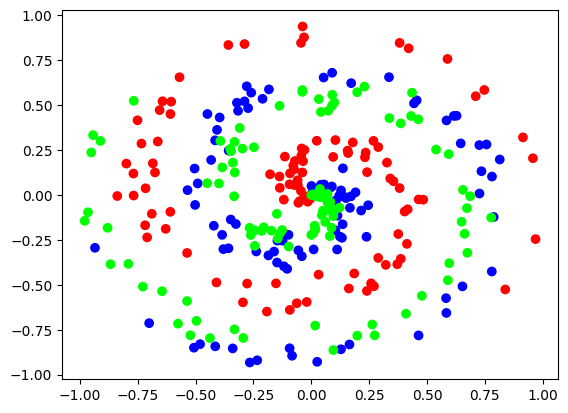

In [36]:
#Training data
from nnfs.datasets import spiral_data
import nnfs
import matplotlib.pyplot as plt
nnfs.init()

'''
  The ​nnfs.init()​ does three things: it sets the random seed to 0 (by the default), creates a
  float32​ dtype default, and overrides the original dot product from NumPy. All of these are meant
  to ensure repeatable results for following along
'''

X, y = spiral_data(samples=100,classes = 3)
plt.scatter(X[:,0],X[:,1], c=y, cmap='brg')
plt.show()


In [84]:
class Layer_Dense:

  def __init__(self, n_inputs, n_neurons):

    self.weights = 0.01 * np.random.randn(n_inputs,n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.inputs = inputs
    self.output = np.dot(inputs, self.weights) + self.biases

  def backward(self, dvalues):
    self.dweights = np.dot(self.inputs.T, dvalues)
    self.dbiases = np.sum(dvalues, axis=0, keepdims = True)
    self.dinputs = np.dot(dvalues, self.weights.T)

In [38]:
class Activation_ReLU:

  def forward(self, inputs):
    self.inputs = inputs
    self.output = np.maximum(0,inputs)
  
  def backward(self, dvalues):
    self.dinputs = dvalues.copy()
    self.dinputs[self.inputs <= 0 ] = 0

In [70]:
class Activation_SoftMax:
  def forward(self, inputs):
    
    self.inputs = inputs

    exp_values = np.exp(inputs - np.max(inputs,axis=1, keepdims=True))

    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    self.output = probabilities

  def backward(self, dvalues):

    self.dinputs = np.empty_like(dvalues)

    for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
      
      single_output = single_output.reshape(-1,1)
      
      jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
      
      self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)


In [40]:
class Activation_Softmax_Loss_CategoricalCrossentropy():
  def __init__(self):
    self.activation = Activation_SoftMax()
    self.loss = Loss_CategoricalCrossEntropy()

  def forward(self, inputs, y_true):
    self.activation.forward(inputs)
    self.output = self.activation.output
    return self.loss.calculate(self.output, y_true)
  def backward(self, dvalues, y_true):
    samples = len(dvalues)
    if len(y_true.shape) == 2:
      y_true = np.argmax(y_true,axis=1)
    self.dinputs = dvalues.copy()
    self.dinputs[range(samples), y_true] -= 1
    self.dinputs = self.dinputs / samples

In [41]:
class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss

In [42]:
class Loss_CategoricalCrossEntropy(Loss):

  def forward(self, y_pred, y_true):
    
    samples = len(y_pred)

    # Clip data to prevent division by 0
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

    # Probabilities for target values
    # Only if categorical labels
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(samples),y_true]
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

  def backward(self, dvalues, y_true):

    samples = len(dvalues)

    labels = len(dvalues[0])

    if len(y_true.shape) == 1:

      y_true = np.eye(labels)[y_true]

    self.dinputs = -y_true / dvalues
    
    self.dinputs = self.dinputs / samples

In [43]:
if __name__ == '__main__':
  X, y = spiral_data(samples=100,classes = 3)
  dense1 = Layer_Dense(2,3)
  activation1 = Activation_ReLU()
  dense1.forward(X)
  activation1.forward(dense1.output)
  
  dense2 = Layer_Dense(3,3)
  activation2 = Activation_SoftMax()

  dense2.forward(activation1.output)

  activation2.forward(dense2.output)

  print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.3333333  0.33333334]
 [0.3333335  0.333333   0.33333352]
 [0.33333334 0.33333334 0.33333334]]


In [44]:
# Loss calculation test

softmax_outputs = np.array([[0.7,0.1,0.2],
                            [0.1,0.5,0.4],
                            [0.02,0.9,0.08]])

class_targets = np.array([[1,0,0],
                          [0,1,0],
                          [0,1,0]])

loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(softmax_outputs,class_targets)
print(loss)

0.38506088005216804


In [45]:
# Calculating loss for the pratical example

if __name__ == '__main__':

  X, y = spiral_data(samples=100,classes = 3)
  dense1 = Layer_Dense(2,3)
  activation1 = Activation_ReLU()
  dense1.forward(X)
  activation1.forward(dense1.output)
  
  dense2 = Layer_Dense(3,3)
  activation2 = Activation_SoftMax()

  dense2.forward(activation1.output)

  activation2.forward(dense2.output)
  print('softmax output:',activation2.output[:5])

  loss_function = Loss_CategoricalCrossEntropy()
  loss = loss_function.calculate(activation2.output, y)
  print('loss:', loss)

softmax output: [[0.33333334 0.33333334 0.33333334]
 [0.33333337 0.33333337 0.3333332 ]
 [0.3333335  0.33333352 0.333333  ]
 [0.3333337  0.33333373 0.3333326 ]
 [0.33333334 0.33333334 0.33333334]]
loss: 1.0986115


In [46]:
# Accuracy calculation test

softmax_outputs = np.array([[0.7,0.1,0.2],
                            [0.1,0.5,0.4],
                            [0.02,0.9,0.08]])

class_targets = np.array([[0,1,1]])

predictions = np.argmax(softmax_outputs, axis=1)
print('predictions: ',predictions)

if len(class_targets.shape) == 2:
 class_targets = np.argmax(class_targets,axis=1)
print('y: ', class_targets)

accuracy = np.mean(predictions==class_targets)
print('acc: ',accuracy)

predictions:  [0 1 1]
y:  [1]
acc:  0.6666666666666666


In [47]:
# Calculating loss for the pratical example + Accuracy

if __name__ == '__main__':

  X, y = spiral_data(samples=100,classes = 3)
  dense1 = Layer_Dense(2,3)
  activation1 = Activation_ReLU()
  dense1.forward(X)
  activation1.forward(dense1.output)
  
  dense2 = Layer_Dense(3,3)
  activation2 = Activation_SoftMax()

  dense2.forward(activation1.output)

  activation2.forward(dense2.output)
  print('softmax output:',activation2.output[:5])

  loss_function = Loss_CategoricalCrossEntropy()
  loss = loss_function.calculate(activation2.output, y)

  predictions = np.argmax(activation2.output, axis=1)
  if len(y.shape) == 2:
    y = np.argmax(y,axis=1)
  accuracy = np.mean(predictions==y)
  print('acc: ', accuracy)
  print('loss: ', loss)

softmax output: [[0.33333334 0.33333334 0.33333334]
 [0.33333376 0.33333334 0.3333329 ]
 [0.33333433 0.33333334 0.3333323 ]
 [0.33333424 0.33333334 0.33333236]
 [0.33333528 0.33333337 0.33333135]]
acc:  0.26
loss:  1.0986187


# Introducing optimization

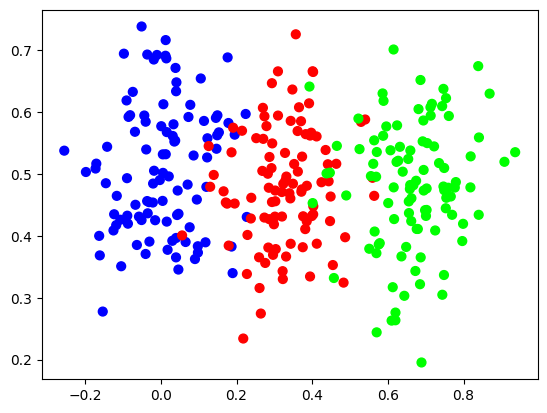

In [48]:
from nnfs.datasets import vertical_data
nnfs.init()

X, y = vertical_data(samples=100,classes = 3)
plt.scatter(X[:,0], X[:,1],c=y, s = 40, cmap = 'brg')
plt.show()

In [49]:
if __name__ == '__main__':
  dense1 = Layer_Dense(2,3)
  activation1 = Activation_ReLU()
  dense2 = Layer_Dense(3,3)
  activation2 = Activation_SoftMax()

  loss_function = Loss_CategoricalCrossEntropy()

  lowest_loss = 9999999
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()

  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  best_loss_list = []

  for iteration in range(10000):
    
    #update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2,3)
    dense1.biases += 0.05 * np.random.randn(1,3)

    dense2.weights += 0.05 * np.random.randn(3,3)
    dense2.biases += 0.05 * np.random.randn(1,3)

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss = loss_function.calculate(activation2.output,y)

    predictions = np.argmax(activation2.output, axis = 1)
    accuracy = np.mean(predictions == y)

    if loss < lowest_loss:
      print('New set of weights found, iteration', iteration,
            'loss: ', loss,
            'acc: ', accuracy)
      
      best_dense1_weights = dense1.weights.copy()
      best_dense1_biases = dense1.biases.copy()

      best_dense2_weights = dense2.weights.copy()
      best_dense2_biases = dense2.biases.copy()

      lowest_loss = loss
      best_loss_list.append(loss)

    else:
      dense1.weights = best_dense1_weights.copy()
      dense1.biases = best_dense1_biases.copy()

      dense2.weights = best_dense2_weights.copy()
      dense2.biases = best_dense2_biases.copy()
      best_loss_list.append(lowest_loss)


New set of weights found, iteration 0 loss:  1.0987684 acc:  0.3333333333333333
New set of weights found, iteration 1 loss:  1.0987465 acc:  0.3333333333333333
New set of weights found, iteration 5 loss:  1.0976487 acc:  0.3333333333333333
New set of weights found, iteration 6 loss:  1.0972018 acc:  0.3333333333333333
New set of weights found, iteration 10 loss:  1.0938749 acc:  0.3333333333333333
New set of weights found, iteration 19 loss:  1.0935849 acc:  0.6666666666666666
New set of weights found, iteration 20 loss:  1.0908297 acc:  0.3333333333333333
New set of weights found, iteration 21 loss:  1.0905013 acc:  0.3333333333333333
New set of weights found, iteration 22 loss:  1.0879314 acc:  0.3333333333333333
New set of weights found, iteration 24 loss:  1.0856307 acc:  0.3333333333333333
New set of weights found, iteration 25 loss:  1.0801181 acc:  0.35
New set of weights found, iteration 29 loss:  1.0725244 acc:  0.5266666666666666
New set of weights found, iteration 30 loss:  

Text(0.5, 1.0, 'Loss over iterations')

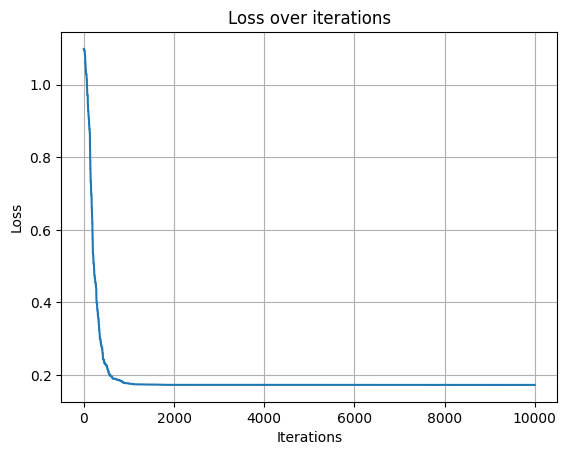

In [50]:
plt.plot(best_loss_list)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over iterations')

In [51]:
#Trying with spiral dataset


if __name__ == '__main__':
  X, y = spiral_data(samples=100,classes = 3)
  dense1 = Layer_Dense(2,3)
  activation1 = Activation_ReLU()
  dense2 = Layer_Dense(3,3)
  activation2 = Activation_SoftMax()

  loss_function = Loss_CategoricalCrossEntropy()

  lowest_loss = 9999999
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()

  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  best_loss_list = []

  for iteration in range(10000):
    
    #update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2,3)
    dense1.biases += 0.05 * np.random.randn(1,3)

    dense2.weights += 0.05 * np.random.randn(3,3)
    dense2.biases += 0.05 * np.random.randn(1,3)

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss = loss_function.calculate(activation2.output,y)

    predictions = np.argmax(activation2.output, axis = 1)
    accuracy = np.mean(predictions == y)

    if loss < lowest_loss:
      print('New set of weights found, iteration', iteration,
            'loss: ', loss,
            'acc: ', accuracy)
      
      best_dense1_weights = dense1.weights.copy()
      best_dense1_biases = dense1.biases.copy()

      best_dense2_weights = dense2.weights.copy()
      best_dense2_biases = dense2.biases.copy()

      lowest_loss = loss
      best_loss_list.append(loss)

    else:
      dense1.weights = best_dense1_weights.copy()
      dense1.biases = best_dense1_biases.copy()

      dense2.weights = best_dense2_weights.copy()
      dense2.biases = best_dense2_biases.copy()
      best_loss_list.append(lowest_loss)


New set of weights found, iteration 0 loss:  1.0999306 acc:  0.3333333333333333
New set of weights found, iteration 2 loss:  1.0999146 acc:  0.3333333333333333
New set of weights found, iteration 4 loss:  1.0990082 acc:  0.35
New set of weights found, iteration 6 loss:  1.0979306 acc:  0.36666666666666664
New set of weights found, iteration 11 loss:  1.0977046 acc:  0.34
New set of weights found, iteration 13 loss:  1.0971706 acc:  0.4066666666666667
New set of weights found, iteration 14 loss:  1.0967075 acc:  0.3333333333333333
New set of weights found, iteration 17 loss:  1.0966543 acc:  0.3433333333333333
New set of weights found, iteration 20 loss:  1.0956889 acc:  0.3433333333333333
New set of weights found, iteration 21 loss:  1.0954334 acc:  0.33666666666666667
New set of weights found, iteration 26 loss:  1.0953525 acc:  0.35333333333333333
New set of weights found, iteration 37 loss:  1.0946891 acc:  0.36666666666666664
New set of weights found, iteration 40 loss:  1.0944422 

Text(0.5, 1.0, 'Loss over iterations')

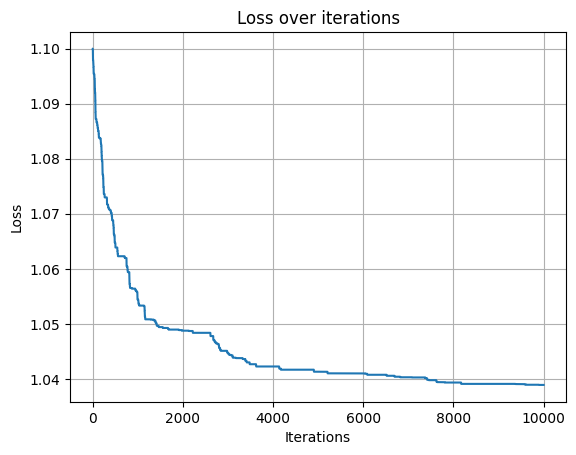

In [52]:
plt.plot(best_loss_list)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over iterations')

# Backpropagation

In [71]:
import numpy as np
import nnfs

nnfs.init()

softmax_outputs = np.array([[0.7,0.1,0.2],
                            [0.1,0.5,0.4],
                            [0.02,0.9,0.08]])

class_targets = np.array([0,1,1])


softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
softmax_loss.backward(softmax_outputs, class_targets)
dvalues1 = softmax_loss.dinputs

activation = Activation_SoftMax()
activation.output = softmax_outputs
loss = Loss_CategoricalCrossEntropy()
loss.backward(softmax_outputs, class_targets)
activation.backward(loss.dinputs)
dvalues2 = activation.dinputs

print('Gradients: combined loss and activation:')
print(dvalues1)

print('Gradients: separed loss and activation:')
print(dvalues2)

Gradients: combined loss and activation:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
Gradients: separed loss and activation:
[[-0.09999999  0.03333334  0.06666667]
 [ 0.03333334 -0.16666667  0.13333334]
 [ 0.00666667 -0.03333333  0.02666667]]


In [75]:
#Verifying time difference between methods

from timeit import timeit

nnfs.init()

softmax_outputs = np.array([[0.7,0.1,0.2],
                            [0.1,0.5,0.4],
                            [0.02,0.9,0.08]])

class_targets = np.array([0,1,1])

def f1():
  softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
  softmax_loss.backward(softmax_outputs, class_targets)
  dvalues1 = softmax_loss.dinputs

def f2():
  activation = Activation_SoftMax()
  activation.output = softmax_outputs
  loss = Loss_CategoricalCrossEntropy()
  loss.backward(softmax_outputs, class_targets)
  activation.backward(loss.dinputs)
  dvalues2 = activation.dinputs

t1 = timeit(lambda: f1(), number=10000)
t2 = timeit(lambda: f2(), number= 10000)

print('Ratio execution velocity :', t2/t1)

Ratio execution velocity : 15.921781344901266


In [86]:
if __name__ == '__main__':
  X, y = spiral_data(samples=100,classes = 3)
  dense1 = Layer_Dense(2,3)
  activation1 = Activation_ReLU()

  dense2 = Layer_Dense(3,3)

  loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

  dense1.forward(X)

  activation1.forward(dense1.output)

  dense2.forward(activation1.output)

  loss= loss_activation.forward(dense2.output,y)

  predictions = np.argmax(loss_activation.output, axis=1)
  if len(y.shape) == 2:
    y = np.argmax(y,axis=1)
  acc = np.mean(predictions==y)
  print('loss: ', loss)
  print('acc: ', acc)

  #Backward pass

  loss_activation.backward(loss_activation.output,y)
  dense2.backward(loss_activation.dinputs)
  
  activation1.backward(dense2.dinputs)
  dense1.backward(activation1.dinputs)

  print(dense1.weights)
  (dense1.dbiases)
  print(dense2.weights)
  print(dense2.dbiases)
  

loss:  1.0986124
acc:  0.3566666666666667
[[ 0.00139827  0.01738857 -0.00045383]
 [-0.00053138 -0.01949572 -0.00960105]]
[[-0.00783499  0.00107519  0.00013985]
 [-0.00578942 -0.00588813 -0.00166153]
 [-0.01381412 -0.00612639 -0.0038129 ]]
[[-5.9680315e-06 -9.2980918e-07  6.3437037e-06]]


# Optimizers

In [144]:
class Optimizer_SGD:

  def __init__(self, learning_rate = 1., decay = 0., momentum = 0.):
    self.learning_rate = learning_rate
    self.current_learning_rate = learning_rate
    self.decay = decay
    self.iterations = 0
    self.momentum = momentum
  
  def pre_update_params(self):
    if self.decay:
      self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))


  def update_params(self, layer):
    if self.momentum:
      if not hasattr(layer, 'weight_momentums'):
        layer.weight_momentums = np.zeros_like(layer.weights)
        layer.bias_momentums = np.zeros_like(layer.biases)
        
      weight_updates = self.momentum*layer.weight_momentums - self.current_learning_rate * layer.dweights
      layer.weight_momentums = weight_updates

      bias_updates = self.momentum*layer.bias_momentums - self.current_learning_rate * layer.dbiases
      layer.bias_momentums = bias_updates
   
    #Vanilla SGD updates
    else:
      weight_updates = -self.current_learning_rate * layer.dweights
      bias_updates = -self.current_learning_rate * layer.dbiases
    
    layer.weights += weight_updates
    layer.biases += bias_updates
      
  
  def post_update_params(self):
    self.iterations += 1

In [108]:
#learning rate 2

if __name__ == '__main__':

  X, y = spiral_data(samples=100,classes = 3)

  dense1 = Layer_Dense(2,64)
  activation1 = Activation_ReLU()

  dense2 = Layer_Dense(64,3)

  loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy() 

  optimizer = Optimizer_SGD(2)

  best_loss_list0 = []
  lowest_loss = 9999999

  for epoch in range(10001):
    dense1.forward(X)

    activation1.forward(dense1.output)

    dense2.forward(activation1.output)

    loss= loss_activation.forward(dense2.output,y)
    if loss < lowest_loss:
      best_loss_list0.append(loss)
      lowest_loss = loss
    else:
      best_loss_list0.append(lowest_loss)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
      y = np.argmax(y,axis=1)
    acc = np.mean(predictions==y)

    if not epoch % 100:
      print(f'epoch: {epoch} ' + f'loss: {round(loss, 2)} ' + f'acc: {round(acc,2)}')

    #Backward pass

    loss_activation.backward(loss_activation.output,y)
    dense2.backward(loss_activation.dinputs)
    
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.update_params(dense1)
    optimizer.update_params(dense2)


epoch: 0 loss: 1.100000023841858 acc: 0.38
epoch: 100 loss: 1.0499999523162842 acc: 0.45
epoch: 200 loss: 1.0499999523162842 acc: 0.47
epoch: 300 loss: 1.0499999523162842 acc: 0.46
epoch: 400 loss: 1.0499999523162842 acc: 0.45
epoch: 500 loss: 1.059999942779541 acc: 0.42
epoch: 600 loss: 1.0499999523162842 acc: 0.45
epoch: 700 loss: 1.0700000524520874 acc: 0.44
epoch: 800 loss: 1.0299999713897705 acc: 0.44
epoch: 900 loss: 1.0299999713897705 acc: 0.47
epoch: 1000 loss: 1.059999942779541 acc: 0.4
epoch: 1100 loss: 1.0 acc: 0.46
epoch: 1200 loss: 1.0 acc: 0.43
epoch: 1300 loss: 1.0 acc: 0.42
epoch: 1400 loss: 1.0 acc: 0.42
epoch: 1500 loss: 0.949999988079071 acc: 0.49
epoch: 1600 loss: 0.9700000286102295 acc: 0.48
epoch: 1700 loss: 0.9800000190734863 acc: 0.48
epoch: 1800 loss: 0.9300000071525574 acc: 0.56
epoch: 1900 loss: 0.9200000166893005 acc: 0.53
epoch: 2000 loss: 0.9399999976158142 acc: 0.51
epoch: 2100 loss: 0.9599999785423279 acc: 0.5
epoch: 2200 loss: 0.8500000238418579 acc: 0.

In [109]:
#learning rate 1

if __name__ == '__main__':

  X, y = spiral_data(samples=100,classes = 3)

  dense1 = Layer_Dense(2,64)
  activation1 = Activation_ReLU()

  dense2 = Layer_Dense(64,3)

  loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy() 

  optimizer = Optimizer_SGD(1)

  best_loss_list1 = []
  lowest_loss = 9999999

  for epoch in range(10001):
    dense1.forward(X)

    activation1.forward(dense1.output)

    dense2.forward(activation1.output)

    loss= loss_activation.forward(dense2.output,y)
    if loss < lowest_loss:
      best_loss_list1.append(loss)
      lowest_loss = loss
    else:
      best_loss_list1.append(lowest_loss)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
      y = np.argmax(y,axis=1)
    acc = np.mean(predictions==y)

    if not epoch % 100:
      print(f'epoch: {epoch} ' + f'loss: {round(loss, 2)} ' + f'acc: {round(acc,2)}')

    #Backward pass

    loss_activation.backward(loss_activation.output,y)
    dense2.backward(loss_activation.dinputs)
    
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.update_params(dense1)
    optimizer.update_params(dense2)


epoch: 0 loss: 1.100000023841858 acc: 0.33
epoch: 100 loss: 1.0800000429153442 acc: 0.4
epoch: 200 loss: 1.0700000524520874 acc: 0.42
epoch: 300 loss: 1.0700000524520874 acc: 0.43
epoch: 400 loss: 1.0700000524520874 acc: 0.44
epoch: 500 loss: 1.0700000524520874 acc: 0.43
epoch: 600 loss: 1.0700000524520874 acc: 0.43
epoch: 700 loss: 1.059999942779541 acc: 0.46
epoch: 800 loss: 1.059999942779541 acc: 0.44
epoch: 900 loss: 1.0499999523162842 acc: 0.46
epoch: 1000 loss: 1.0499999523162842 acc: 0.45
epoch: 1100 loss: 1.0399999618530273 acc: 0.45
epoch: 1200 loss: 1.0299999713897705 acc: 0.48
epoch: 1300 loss: 1.0299999713897705 acc: 0.48
epoch: 1400 loss: 1.0199999809265137 acc: 0.48
epoch: 1500 loss: 1.0199999809265137 acc: 0.39
epoch: 1600 loss: 1.0199999809265137 acc: 0.44
epoch: 1700 loss: 1.0199999809265137 acc: 0.45
epoch: 1800 loss: 1.0199999809265137 acc: 0.44
epoch: 1900 loss: 1.0099999904632568 acc: 0.46
epoch: 2000 loss: 0.9900000095367432 acc: 0.45
epoch: 2100 loss: 0.990000009

In [110]:
#learning rate 0.5

if __name__ == '__main__':

  X, y = spiral_data(samples=100,classes = 3)

  dense1 = Layer_Dense(2,64)
  activation1 = Activation_ReLU()

  dense2 = Layer_Dense(64,3)

  loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy() 

  optimizer = Optimizer_SGD(0.5)

  best_loss_list2 = []
  lowest_loss = 9999999

  for epoch in range(10001):
    dense1.forward(X)

    activation1.forward(dense1.output)

    dense2.forward(activation1.output)

    loss= loss_activation.forward(dense2.output,y)
    if loss < lowest_loss:
      best_loss_list2.append(loss)
      lowest_loss = loss
    else:
      best_loss_list2.append(lowest_loss)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
      y = np.argmax(y,axis=1)
    acc = np.mean(predictions==y)

    if not epoch % 100:
      print(f'epoch: {epoch} ' + f'loss: {round(loss, 2)} ' + f'acc: {round(acc,2)}')

    #Backward pass

    loss_activation.backward(loss_activation.output,y)
    dense2.backward(loss_activation.dinputs)
    
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.update_params(dense1)
    optimizer.update_params(dense2)


epoch: 0 loss: 1.100000023841858 acc: 0.36
epoch: 100 loss: 1.100000023841858 acc: 0.42
epoch: 200 loss: 1.0800000429153442 acc: 0.43
epoch: 300 loss: 1.0700000524520874 acc: 0.42
epoch: 400 loss: 1.0700000524520874 acc: 0.42
epoch: 500 loss: 1.0700000524520874 acc: 0.43
epoch: 600 loss: 1.0700000524520874 acc: 0.45
epoch: 700 loss: 1.0700000524520874 acc: 0.46
epoch: 800 loss: 1.0700000524520874 acc: 0.46
epoch: 900 loss: 1.059999942779541 acc: 0.46
epoch: 1000 loss: 1.059999942779541 acc: 0.45
epoch: 1100 loss: 1.059999942779541 acc: 0.44
epoch: 1200 loss: 1.059999942779541 acc: 0.45
epoch: 1300 loss: 1.059999942779541 acc: 0.45
epoch: 1400 loss: 1.059999942779541 acc: 0.45
epoch: 1500 loss: 1.059999942779541 acc: 0.46
epoch: 1600 loss: 1.059999942779541 acc: 0.46
epoch: 1700 loss: 1.0499999523162842 acc: 0.45
epoch: 1800 loss: 1.0499999523162842 acc: 0.45
epoch: 1900 loss: 1.0399999618530273 acc: 0.45
epoch: 2000 loss: 1.0299999713897705 acc: 0.46
epoch: 2100 loss: 1.029999971389770

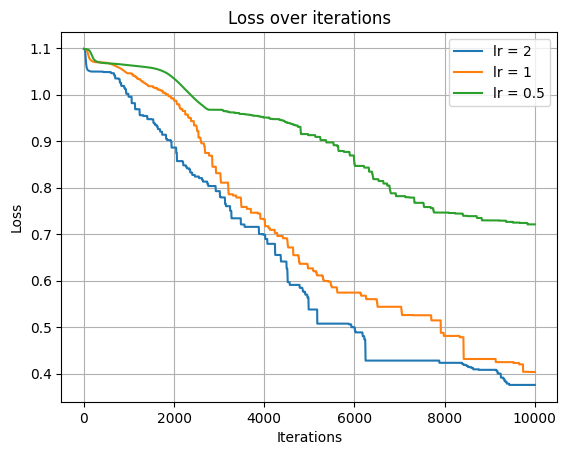

In [117]:
plt.plot(best_loss_list0)
plt.plot(best_loss_list1)
plt.plot(best_loss_list2)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over iterations')
plt.legend(['lr = 2', 'lr = 1', 'lr = 0.5'])
plt.show()

#Learning rate decay

In [147]:
#learning rate 2

if __name__ == '__main__':

  X, y = spiral_data(samples=100,classes = 3)

  dense1 = Layer_Dense(2,64)
  activation1 = Activation_ReLU()

  dense2 = Layer_Dense(64,3)

  loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy() 

  optimizer = Optimizer_SGD(decay = 1e-3)

  best_loss_list = []
  learning_rate_list = []
  accuracy_list = []
  lowest_loss = 9999999
  highest_accuracy = 0

  for epoch in range(10001):
    dense1.forward(X)

    activation1.forward(dense1.output)

    dense2.forward(activation1.output)

    loss= loss_activation.forward(dense2.output,y)
    if loss < lowest_loss:
      best_loss_list.append(loss)
      lowest_loss = loss
    else:
      best_loss_list.append(lowest_loss)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
      y = np.argmax(y,axis=1)
    acc = np.mean(predictions==y)
    if acc > highest_accuracy:
      accuracy_list.append(acc)
      highest_accuracy = acc
    else:
      accuracy_list.append(highest_accuracy)


    if not epoch % 100:
      print(f'epoch: {epoch} ' +
            f'loss: {round(loss, 2)} ' +
            f'acc: {round(acc,2)} ' + 
            f'lr: {optimizer.current_learning_rate}')

    #Backward pass

    loss_activation.backward(loss_activation.output,y)
    dense2.backward(loss_activation.dinputs)
    
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()
    
    learning_rate_list.append(optimizer.current_learning_rate)


epoch: 0 loss: 1.100000023841858 acc: 0.35 lr: 1.0
epoch: 100 loss: 1.0800000429153442 acc: 0.42 lr: 0.9099181073703367
epoch: 200 loss: 1.0800000429153442 acc: 0.42 lr: 0.8340283569641367
epoch: 300 loss: 1.0700000524520874 acc: 0.42 lr: 0.7698229407236336
epoch: 400 loss: 1.0700000524520874 acc: 0.43 lr: 0.7147962830593281
epoch: 500 loss: 1.0700000524520874 acc: 0.42 lr: 0.66711140760507
epoch: 600 loss: 1.0700000524520874 acc: 0.42 lr: 0.6253908692933083
epoch: 700 loss: 1.0700000524520874 acc: 0.41 lr: 0.5885815185403178
epoch: 800 loss: 1.0700000524520874 acc: 0.42 lr: 0.5558643690939411
epoch: 900 loss: 1.0700000524520874 acc: 0.43 lr: 0.526592943654555
epoch: 1000 loss: 1.059999942779541 acc: 0.44 lr: 0.5002501250625312
epoch: 1100 loss: 1.059999942779541 acc: 0.44 lr: 0.4764173415912339
epoch: 1200 loss: 1.0499999523162842 acc: 0.46 lr: 0.45475216007276037
epoch: 1300 loss: 1.0499999523162842 acc: 0.46 lr: 0.43497172683775553
epoch: 1400 loss: 1.0399999618530273 acc: 0.47 lr: 

<ipython-input-148-893fdaefb703>:12: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[2].get_shared_x_axes().join(axs[2],axs[1], axs[0])


Text(0.5, 0.01, 'Epochs')

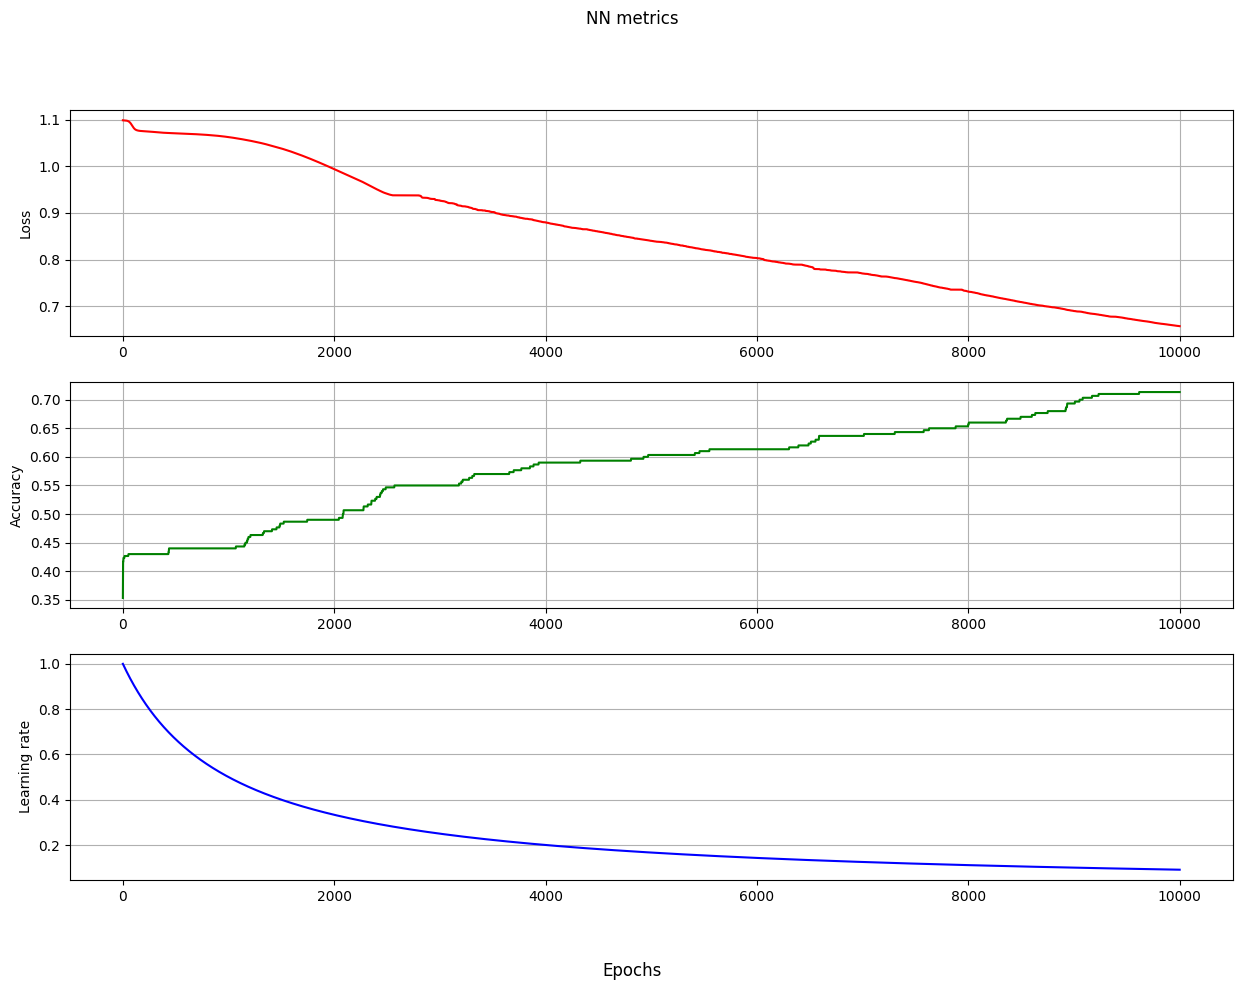

In [148]:
fig, axs = plt.subplots(3,1, figsize = (15,10))
fig.suptitle('NN metrics')
axs[0].plot(best_loss_list, color = 'r',  label='Loss')
axs[0].set_ylabel('Loss')

axs[1].plot(accuracy_list, color = 'g',  label='Accuracy')
axs[1].set_ylabel('Accuracy')

axs[2].plot(learning_rate_list, color = 'b', label='Learning rate')
axs[2].set_ylabel('Learning rate')

axs[2].get_shared_x_axes().join(axs[2],axs[1], axs[0])
axs[2].grid(axis="x")

axs[0].grid()
axs[1].grid()
axs[2].grid()

fig.supxlabel('Epochs')


In [155]:
#With momentum

#learning rate 2

if __name__ == '__main__':

  X, y = spiral_data(samples=100,classes = 3)

  dense1 = Layer_Dense(2,64)
  activation1 = Activation_ReLU()

  dense2 = Layer_Dense(64,3)

  loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy() 

  optimizer = Optimizer_SGD(decay = 1e-3, momentum = 0.9)

  best_loss_list = []
  learning_rate_list = []
  accuracy_list = []
  lowest_loss = 9999999
  highest_accuracy = 0

  for epoch in range(10001):
    dense1.forward(X)

    activation1.forward(dense1.output)

    dense2.forward(activation1.output)

    loss= loss_activation.forward(dense2.output,y)
    if loss < lowest_loss:
      best_loss_list.append(loss)
      lowest_loss = loss
    else:
      best_loss_list.append(lowest_loss)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
      y = np.argmax(y,axis=1)
    acc = np.mean(predictions==y)
    if acc > highest_accuracy:
      accuracy_list.append(acc)
      highest_accuracy = acc
    else:
      accuracy_list.append(highest_accuracy)


    if not epoch % 100:
      print(f'epoch: {epoch} ' +
            f'loss: {round(loss, 2)} ' +
            f'acc: {round(acc,2)} ' + 
            f'lr: {optimizer.current_learning_rate}')

    #Backward pass

    loss_activation.backward(loss_activation.output,y)
    dense2.backward(loss_activation.dinputs)
    
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()
    
    learning_rate_list.append(optimizer.current_learning_rate)


epoch: 0 loss: 1.100000023841858 acc: 0.35 lr: 1.0
epoch: 100 loss: 0.9800000190734863 acc: 0.49 lr: 0.9099181073703367
epoch: 200 loss: 0.8899999856948853 acc: 0.51 lr: 0.8340283569641367
epoch: 300 loss: 0.6700000166893005 acc: 0.73 lr: 0.7698229407236336
epoch: 400 loss: 0.6000000238418579 acc: 0.71 lr: 0.7147962830593281
epoch: 500 loss: 0.47999998927116394 acc: 0.77 lr: 0.66711140760507
epoch: 600 loss: 0.5 acc: 0.77 lr: 0.6253908692933083
epoch: 700 loss: 0.3700000047683716 acc: 0.85 lr: 0.5885815185403178
epoch: 800 loss: 0.3100000023841858 acc: 0.87 lr: 0.5558643690939411
epoch: 900 loss: 0.25999999046325684 acc: 0.89 lr: 0.526592943654555
epoch: 1000 loss: 0.23000000417232513 acc: 0.91 lr: 0.5002501250625312
epoch: 1100 loss: 0.20999999344348907 acc: 0.92 lr: 0.4764173415912339
epoch: 1200 loss: 0.20000000298023224 acc: 0.93 lr: 0.45475216007276037
epoch: 1300 loss: 0.18000000715255737 acc: 0.93 lr: 0.43497172683775553
epoch: 1400 loss: 0.18000000715255737 acc: 0.93 lr: 0.4168

<ipython-input-156-893fdaefb703>:12: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[2].get_shared_x_axes().join(axs[2],axs[1], axs[0])


Text(0.5, 0.01, 'Epochs')

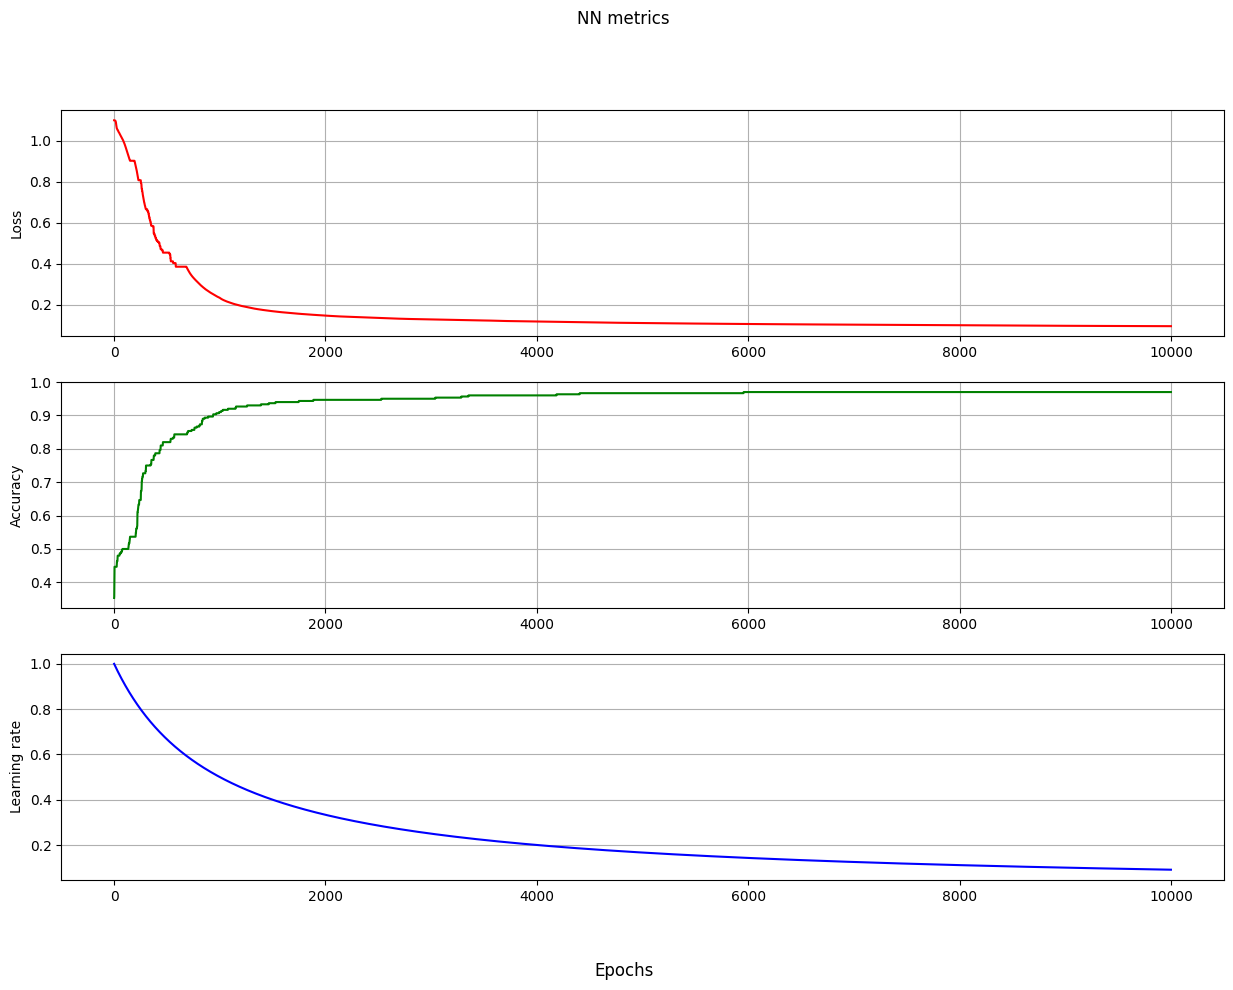

In [156]:
fig, axs = plt.subplots(3,1, figsize = (15,10))
fig.suptitle('NN metrics')
axs[0].plot(best_loss_list, color = 'r',  label='Loss')
axs[0].set_ylabel('Loss')

axs[1].plot(accuracy_list, color = 'g',  label='Accuracy')
axs[1].set_ylabel('Accuracy')

axs[2].plot(learning_rate_list, color = 'b', label='Learning rate')
axs[2].set_ylabel('Learning rate')

axs[2].get_shared_x_axes().join(axs[2],axs[1], axs[0])
axs[2].grid(axis="x")

axs[0].grid()
axs[1].grid()
axs[2].grid()

fig.supxlabel('Epochs')
